In [1]:
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
import seaborn as sns
sns.set()

import numpy as np
import pandas as pd
final_data=pd.read_csv("E:\\dataset\\diabete\\New folder\\final_data\\d_mean.csv")
final_data.head()

Matplotlib is building the font cache; this may take a moment.


,Age,Gender,BMI,SBP,DBP,FPG,Chol,Tri,HDL,LDL,ALT,BUN,CCR,FFPG,smoking,drinking,family_histroy,Diabetes
0,26,1,20.1,119,81,5.80,4.36,0.86,0.90,2.43,12.0,5.40,63.8,5.40,3.0,3.0,0,0
1,40,1,17.7,97,54,4.60,3.70,1.02,1.50,2.04,9.2,3.70,70.3,4.10,1.0,1.0,0,0
2,40,2,19.7,85,53,5.30,5.87,1.29,1.75,3.37,10.1,4.10,61.1,4.85,3.0,3.0,0,0
3,43,1,23.1,111,71,4.50,4.05,0.74,1.27,2.60,36.5,4.38,73.4,5.30,2.0,3.0,0,0
4,36,1,26.5,130,82,5.54,6.69,3.49,0.91,3.64,69.3,3.86,67.5,5.53,3.0,3.0,0,0


In [2]:

sd=StandardScaler() 

x=final_data.values[:, 0:17]
y=final_data.values[:, 17]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

x_train_sd=sd.fit_transform(x_train)
x_test_sd=sd.fit_transform(x_test)

y_train=y_train.ravel()

In [3]:
import xgboost as xgb
from xgboost import XGBClassifier


from time import time
t1 = time()
model = XGBClassifier()
model.fit(x_train_sd, y_train)
t2 = time()
elapsed = t2 - t1
print('Elapsed time is %f seconds.' % elapsed)
y_pred = model.predict(x_test_sd)
y_pred = model.predict(x_test_sd)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, x_train_sd, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
nn_scores = cross_val_score(model, x_train_sd, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Mean mae: %.3f (%.3f)' % (mean(nn_scores), std(nn_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(x_train_sd, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(x_test_sd, y_test)))




#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn import metrics


print(classification_report(y_test,y_pred))
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity)
print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('f1 score:', f1_score(y_test, y_pred))



from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
GXB_roc_auc = roc_auc_score(y_test, model.predict(x_test_sd))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_sd)[:,1])
pyplot.figure()
pyplot.plot(fpr, tpr, label='GXB (area = %0.2f)' % GXB_roc_auc)
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.savefig('GXB_ROC')
pyplot.show()

ModuleNotFoundError: No module named 'xgboost'

[0.01730816 0.         0.00772173 0.01035558 0.01087854 0.01281571
 0.00845965 0.00986314 0.02999912 0.00874893 0.00884326 0.00981155
 0.00883972 0.10388164 0.7350293  0.01032571 0.00711824]


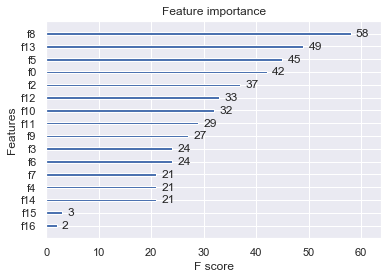

In [8]:
from xgboost import plot_importance
from matplotlib import pyplot
print(model.feature_importances_)
plot_importance(model)
pyplot.show()

Best: -0.154701 using {'subsample': 0.5}
-0.167975 (0.042813) with: {'subsample': 0.1}
-0.169698 (0.056406) with: {'subsample': 0.2}
-0.171506 (0.052852) with: {'subsample': 0.3}
-0.168933 (0.053065) with: {'subsample': 0.4}
-0.154701 (0.054268) with: {'subsample': 0.5}
-0.162473 (0.057734) with: {'subsample': 0.6}
-0.163463 (0.054278) with: {'subsample': 0.7}
-0.167034 (0.058420) with: {'subsample': 0.8}
-0.167150 (0.050871) with: {'subsample': 1.0}


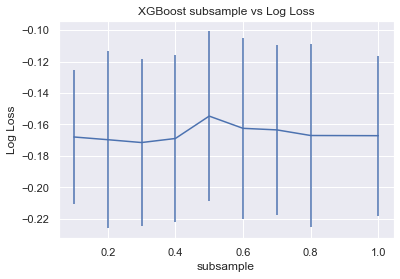

In [10]:
# XGBoost on Otto dataset, tune subsample
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot



# grid search
model = XGBClassifier()
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(subsample=subsample)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train_sd, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(subsample, means, yerr=stds)
pyplot.title("XGBoost subsample vs Log Loss")
pyplot.xlabel('subsample')
pyplot.ylabel('Log Loss')
pyplot.savefig('subsample.png')

Best: -0.141253 using {'colsample_bytree': 0.3}
-0.158347 (0.030537) with: {'colsample_bytree': 0.1}
-0.143957 (0.046747) with: {'colsample_bytree': 0.2}
-0.141253 (0.049195) with: {'colsample_bytree': 0.3}
-0.152363 (0.052143) with: {'colsample_bytree': 0.4}
-0.151698 (0.053098) with: {'colsample_bytree': 0.5}
-0.159486 (0.052845) with: {'colsample_bytree': 0.6}
-0.158897 (0.054464) with: {'colsample_bytree': 0.7}
-0.164728 (0.054412) with: {'colsample_bytree': 0.8}
-0.167150 (0.050871) with: {'colsample_bytree': 1.0}


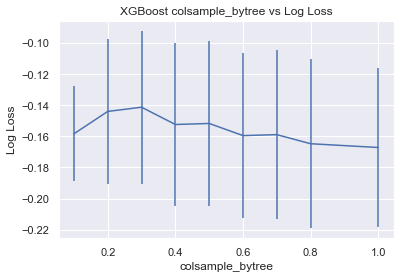

In [11]:
# XGBoost on Otto dataset, tune colsample_bytree
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')


# grid search
model = XGBClassifier()
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(colsample_bytree=colsample_bytree)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train_sd, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(colsample_bytree, means, yerr=stds)
pyplot.title("XGBoost colsample_bytree vs Log Loss")
pyplot.xlabel('colsample_bytree')
pyplot.ylabel('Log Loss')
pyplot.savefig('colsample_bytree.png')

In [8]:

# XGBoost on Otto dataset, tune colsample_bytree
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')


# grid search
model = XGBClassifier()
min_child_weight = [1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
param_grid = dict(min_child_weight=min_child_weight)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train_sd, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(colsample_bytree, means, yerr=stds)
pyplot.title("XGBoost colsample_bytree vs Log Loss")
pyplot.xlabel('colsample_bytree')
pyplot.ylabel('Log Loss')
pyplot.savefig('colsample_bytree.png')

Best: -0.138635 using {'min_child_weight': 19}
-0.167150 (0.050871) with: {'min_child_weight': 1.0}
-0.159877 (0.051624) with: {'min_child_weight': 2}
-0.154898 (0.040723) with: {'min_child_weight': 3}
-0.155392 (0.045799) with: {'min_child_weight': 4}
-0.149827 (0.037656) with: {'min_child_weight': 5}
-0.149203 (0.040015) with: {'min_child_weight': 6}
-0.148745 (0.037888) with: {'min_child_weight': 7}
-0.144577 (0.037741) with: {'min_child_weight': 8}
-0.146474 (0.036532) with: {'min_child_weight': 9}
-0.146868 (0.035750) with: {'min_child_weight': 10}
-0.144294 (0.035263) with: {'min_child_weight': 11}
-0.142293 (0.038385) with: {'min_child_weight': 12}
-0.144958 (0.036582) with: {'min_child_weight': 13}
-0.141010 (0.034690) with: {'min_child_weight': 14}
-0.140469 (0.035419) with: {'min_child_weight': 15}
-0.140739 (0.035638) with: {'min_child_weight': 16}
-0.138639 (0.032965) with: {'min_child_weight': 17}
-0.139747 (0.034266) with: {'min_child_weight': 18}
-0.138635 (0.035146) wit

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [3]:
# XGBoost on Otto dataset, tune colsample_bylevel
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

model = XGBClassifier()
colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
min_child_weight = [1.0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]


param_grid = dict(colsample_bylevel=colsample_bylevel,colsample_bytree=colsample_bytree)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train_sd,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(colsample_bylevel, means, yerr=stds)
pyplot.title("XGBoost colsample_bylevel vs Log Loss")
pyplot.xlabel('colsample_bylevel')
pyplot.ylabel('Log Loss')
pyplot.savefig('colsample_bylevel.png')

Best: -0.130712 using {'colsample_bylevel': 0.1, 'colsample_bytree': 0.3}
-0.158347 (0.030537) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.1}
-0.135807 (0.042119) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.2}
-0.130712 (0.039848) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.3}
-0.136254 (0.041447) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.4}
-0.137500 (0.047213) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.5}
-0.141210 (0.040157) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.6}
-0.137332 (0.041326) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.7}
-0.144981 (0.042927) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 0.8}
-0.140479 (0.046130) with: {'colsample_bylevel': 0.1, 'colsample_bytree': 1.0}
-0.158347 (0.030537) with: {'colsample_bylevel': 0.2, 'colsample_bytree': 0.1}
-0.135807 (0.042119) with: {'colsample_bylevel': 0.2, 'colsample_bytree': 0.2}
-0.130712 (0.039848) with: {'colsample_bylevel': 0.2, 'co

ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [ ]:
# Tune learning_rate
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# grid search
model = XGBClassifier()
learning_rate = [0.3,0.2,0.1,0.01,0.001,0.0001]
max_depth = [2,4,6,8,10,11,12]
n_estimators= [50,100,500,1000,2000]
colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
param_grid = dict(learning_rate=learning_rate,n_estimators=n_estimators, max_depth=max_depth,subsample=subsample,colsample_bytree=colsample_bytree,colsample_bylevel=colsample_bylevel)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train_sd,y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [4]:
from xgboost import XGBClassifier
# setup parameters for xgboost
from time import time
t1 = time()
model = XGBClassifier(booster= 'gbtree',learning_rate= 0.1, max_depth= 2, n_estimators=100,colsample_bylevel= 0.1, colsample_bytree=0.3,subsample=0.5,min_child_weight=4)
model.fit(x_train_sd, y_train)
t2 = time()
elapsed = t2 - t1
print('Elapsed time is %f seconds.' % elapsed)
y_pred = model.predict(x_test_sd)
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model on the dataset
n_scores = cross_val_score(model, x_train_sd, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
nn_scores = cross_val_score(model, x_train_sd, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
# report performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Mean mae: %.3f (%.3f)' % (mean(nn_scores), std(nn_scores)))
print("Accuracy score (training): {0:.3f}".format(model.score(x_train_sd, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(x_test_sd, y_test)))


Elapsed time is 0.298673 seconds.
Mean Accuracy: 0.948 (0.009)
Mean mae: -0.052 (0.009)
Accuracy score (training): 0.955
Accuracy score (validation): 0.952


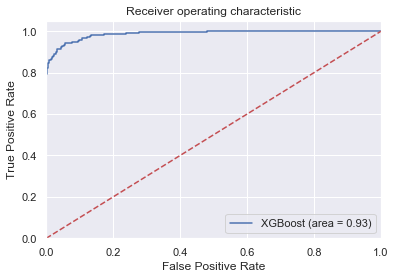

In [10]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot
GXB_roc_auc = roc_auc_score(y_test, model.predict(x_test_sd))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test_sd)[:,1])
pyplot.figure()
pyplot.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % GXB_roc_auc)
pyplot.plot([0, 1], [0, 1],'r--')
pyplot.xlim([0.0, 1.0])
pyplot.ylim([0.0, 1.05])
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('Receiver operating characteristic')
pyplot.legend(loc="lower right")
pyplot.savefig('XGBoost_ROC')
pyplot.show()

In [7]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn import metrics


print(classification_report(y_test,y_pred))
cm1 = confusion_matrix(y_test, y_pred)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy

sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity )
specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity)
print("mean_squared_error : ", mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('f1 score:', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97       920
         1.0       0.97      0.86      0.91       371

    accuracy                           0.95      1291
   macro avg       0.96      0.93      0.94      1291
weighted avg       0.95      0.95      0.95      1291

Confusion Matrix : 
 [[909  11]
 [ 51 320]]
Sensitivity :  0.9880434782608696
Specificity :  0.862533692722372
mean_squared_error :  0.048024786986831915
Root Mean Squared Error: 0.21914558400029857
f1 score: 0.9116809116809117
